In [1]:
from pathlib import Path

import numpy as np
import torch
from PIL import Image

import wallsegmenter as wallseg

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
weights_dir = Path("weights")

In [4]:
segmenter = wallseg.build_segmenter(
    weights_dir / "resnet50_imagenet.pth",
    weights_dir / "wall_encoder_epoch_20.pth",
    weights_dir / "wall_decoder_epoch_20.pth",
    device,
    train_only_wall=True,
)

In [5]:
img_path = Path("room.jpeg")
img = Image.open(img_path).convert("RGB")
bool_mask, scores = wallseg.segment_image(segmenter, img, device)

[W NNPACK.cpp:79] Could not initialize NNPACK! Reason: Unsupported hardware.


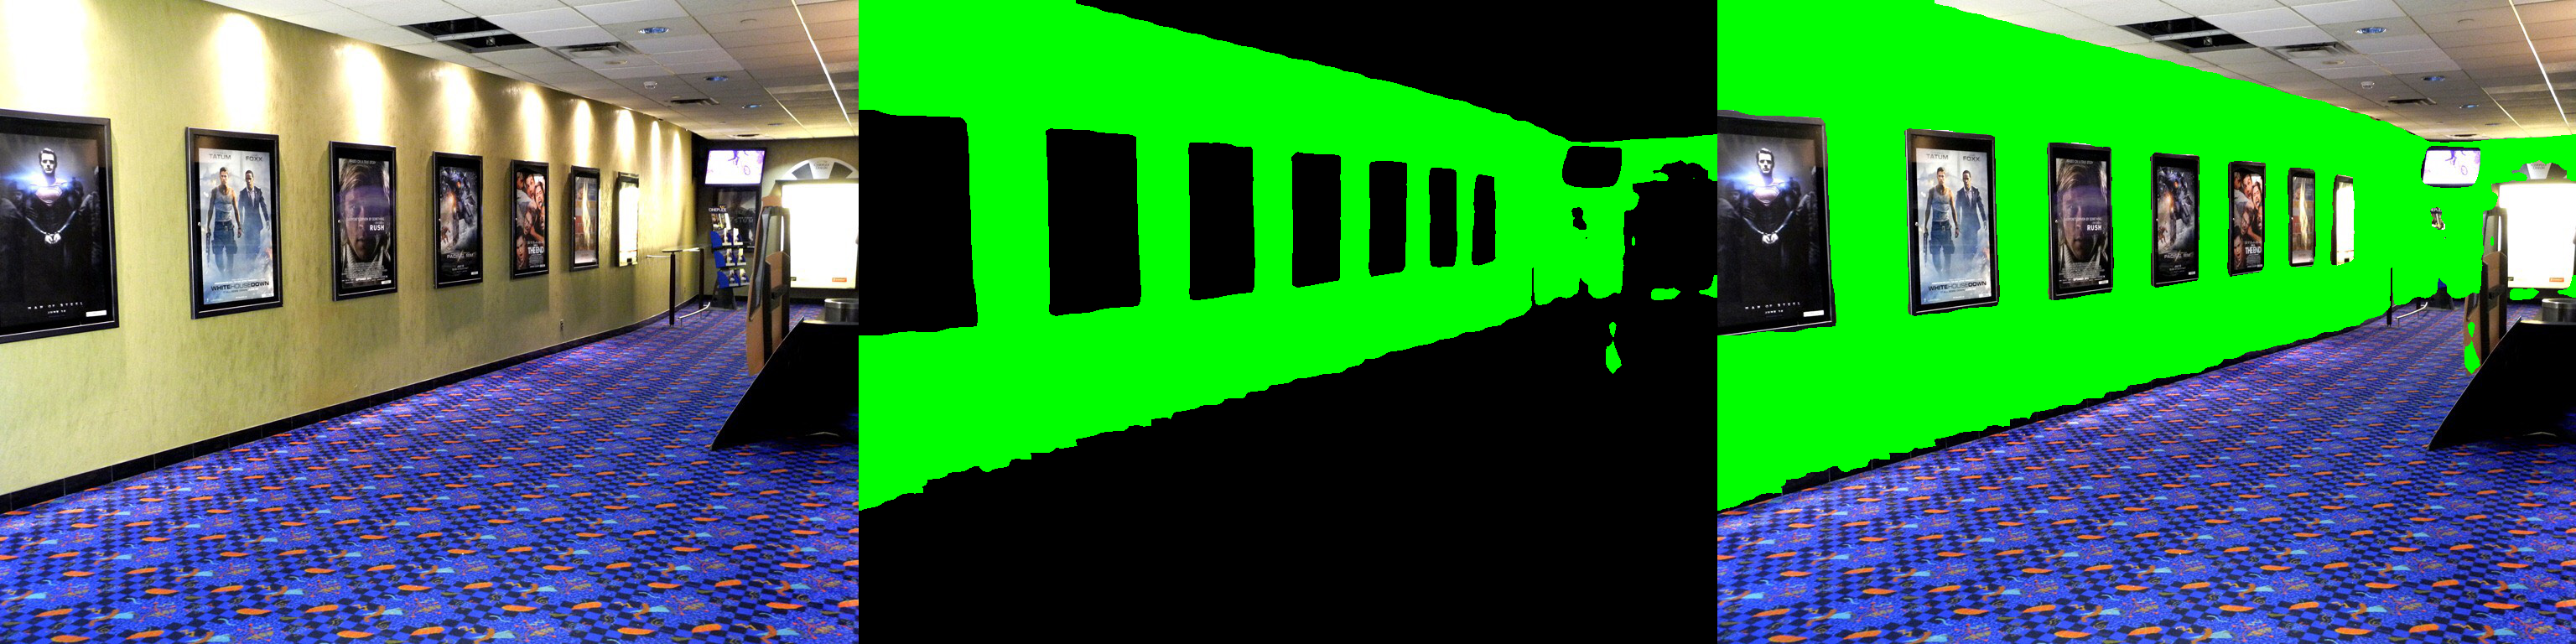

In [6]:
wallseg.visualize_wall(np.asarray(img), bool_mask)